# 1. PROJECT BACKGROUND

**1.1 Problem Statement**

As the technology advance, there are many innovation in the tech industry, one of them is face verification.

**1.2 Project Objectvei**

In this project, I will make a model that can be used to verify as well as to detect spesific face using MTCNN and OpenCV.

____

# 2. IMPORT LIBRARY

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tensorflow as tf 
import cv2 
import numpy as np 
from mtcnn import MTCNN
import matplotlib.pyplot as plt

2022-10-24 22:55:12.953701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


____

# 3. PRE-PROCESSING & MODELING

3.1 Defining MTCNN model

In [7]:
detector = MTCNN()

3.2 Face detection from the first picture.

In [2]:
img=cv2.imread("tom_1.jpg")
location = detector.detect_faces(img)
if len(location) > 0:
    for face in location:
        x, y, width, height = face['box']
        x2, y2 = x + width, y + height
        cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 255), 4)

cv2.imwrite("tom_1_face_verification.jpg",img)
print("The Image was successfully saved")

2022-10-24 22:55:30.541155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 114ms/step
The Image was successfully saved


3.3 Checking the face detection from first image

The shape of below pictures is (1217, 1024, 3)


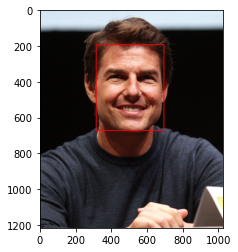

In [16]:
img_1 = plt.imread("tom_1_face_verification.jpg")
print('The shape of below pictures is', img_1.shape)
plt.imshow(img_1)

3.4 Face detection from the second picture.

In [4]:
img=cv2.imread("tom_2.jpg")
location = detector.detect_faces(img)
if len(location) > 0:
    for face in location:
        x, y, width, height = face['box']
        x2, y2 = x + width, y + height
        cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 255), 4)

cv2.imwrite("tom_2_face_verification.jpg",img)
print("The Image was successfully saved")

1/1 [==============================] - 0s 21ms/step
The Image was successfully saved


3.5 Checking the face detection from the second pitures

The shape of below pictures is (934, 1400, 3)


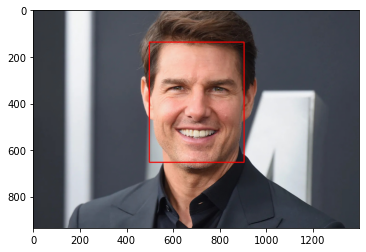

In [17]:
img_2 = plt.imread("tom_2_face_verification.jpg")
print('The shape of below pictures is', img_2.shape)
plt.imshow(img_2)

3.6 Defining function for face processing

In [20]:
def emosion_detector(image):

    img = plt.imread(image) #Load gambar
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Ubah gambar ke grayscale
    faces = detector.detect_faces(img) #Deteksi wajah-wajah yang ada di gambar

    for i in range(len(faces)):
        x, y, w, h = faces[i]['box'] #Ambil koordinat area wajah yang terdeteksi
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 6) #Buat persegi panjang yang sesuai dengan koordinat area wajah dengan warna merah (255,0,0) dan ketebalan 6 pt
        crop = cv2.resize(img[y:y+h,x:x+w],(48,48)) #Potong gambar sesuai dengan area wajah dan mengubah ukuran ke 48x48
        # RGB to GS (3 channel to 1 channel)
        R = crop[:,:,0]
        G = crop[:,:,1]
        B = crop[:,:,2]
        GS = 0.2989*R + 0.5870*G + 0.1140*B
        GS = GS/255.0 #Scaling gambar
        # crop = crop.reshape(-1,48,48,3) #Ubah ukuran array gambar
        plt.imshow(GS, cmap='gray')
    
    return GS

3.7 Processing the first image using function and assign it arrays.

1/1 [==============================] - 0s 28ms/step


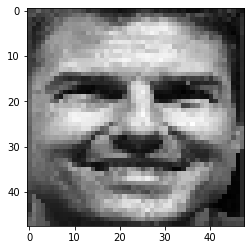

In [30]:
filename_1 = "tom_1_face_verification.jpg"

vektor_1 = emosion_detector(filename_1)

3.8 Processing the second image using function and assign it arrays.

1/1 [==============================] - 0s 27ms/step


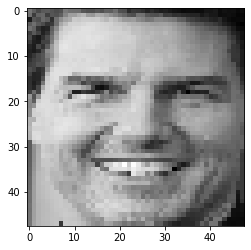

In [31]:
filename_2 = "tom_2_face_verification.jpg"

vektor_2 = emosion_detector(filename_2)

____

# 4. IMAGE VERIFICATION 

4.1 Cosine similarity calculation
- Here I use the manual way of calculation.
- The coefficient of cosine similarity is 0.92, which means the first and the second image have 92% similarity.

In [48]:
CS = vektor_1.flatten() @ vektor_2.flatten() / (np.linalg.norm(vektor_1)*np.linalg.norm(vektor_2))
CS

0.9246765728396921

4.2 Cosine similarity calculation using sklearn library
- Here I use the automatic calculation from sklearn
- The result from this method is 0.92 as well, the calculation result is the way with the manual one.

In [38]:
v1 = vektor_1.reshape(1, 2304)
v2 = vektor_2.reshape(1, 2304)

print(cosine_similarity(v1, v2))

[[0.92467657]]
